# NBA OUTLIER DETECTION USING ISOLATION FOREST

## 1. Introduction

In this note book we aim to perform outlier detection on the NBA player data for the years 2000 to 2004 using an isolation forest algorithm. The goal is to find outstanding players and we shall compare the players found to the actual MVPs of those seasons as well as notice the trend in outstanding players over those years.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## 2. Data Aquisition

We make use of the data from the basketballreference.com, we only use the player data sets since we are only interested in detecting outstanding players.

In [73]:
player_allstar_df = pd.read_csv('databasebasketball/player_allstar.txt', sep=",")
player_playoffs_career_df = pd.read_csv('databasebasketball/player_playoffs_career.txt', sep=",")
player_playoffs_df = pd.read_csv('databasebasketball/player_playoffs.txt', sep=",")
player_regular_season_career_df = pd.read_csv('databasebasketball/player_regular_season_career.txt', sep=",")
player_regular_season_df = pd.read_csv('databasebasketball/player_regular_season.txt', sep=",")
players_df = pd.read_csv('databasebasketball/players.txt', sep=",")

## 3. Data-Preprocessing

In [74]:
def clean_duplicates(df):
    
    """
    
    This function removes duplicates from the dataframe of interest. Since players are sometimes drafted during 
    a season and we would like to remove the deupliacted information.
    
    
    """
    
    
    
    flagged_duplicates = df.duplicated(subset=['ilkid','year'], keep=False)
    
    to_drop = [] 
    
    for i in range(flagged_duplicates.shape[0]):
        if(flagged_duplicates[i]==True and df.iloc[i]['team'] != "TOT"):
            to_drop.append(i)
    
    for i in range(len(to_drop)):
        df.drop(to_drop[i],inplace=True)
    
    return df

Now we can define our data after we clear out the duplicates from the player_regular_season dataframe. We then visualize the last 10 items in the dataframe

In [75]:
data = clean_duplicates(player_regular_season_df)

In [76]:
data.tail(10)

,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,oreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
19102,WILLIFR02,2004,Frank,Williams,CHI,N,9,71,6,2,...,2,3,3.0,9,20,3,0,0,4,0
19103,WILLIJA02,2004,Jason,Williams,MEM,N,71,1952,719,19,...,75,5,130.0,91,644,266,101,80,330,107
19104,WILLIJE01,2004,Jerome,Williams,NYK,N,79,1211,359,115,...,55,10,65.0,155,243,122,172,115,5,0
19105,WILLIKE01,2004,Kevin,Willis,ATL,N,29,344,87,29,...,8,7,15.0,53,90,35,23,17,2,0
19106,WILLIMA01,2004,Maurice,Williams,MIL,N,80,2254,814,50,...,74,11,196.0,221,737,323,160,136,99,32
19107,WILLISC01,2004,Scott,Williams,CLE,N,19,152,33,15,...,4,6,5.0,30,41,12,11,9,1,0
19108,WOODSLO01,2004,Loren,Woods,TOR,N,45,712,176,81,...,8,39,37.0,78,164,71,59,34,1,0
19109,WOODSQY01,2004,Qyntel,Woods,MIA,N,3,40,10,2,...,4,0,2.0,6,12,5,0,0,0,0
19110,WRIGHDO01,2004,Dorell,Wright,MIA,N,3,27,7,0,...,4,0,3.0,2,11,3,1,1,4,0
19111,WRIGHLO02,2004,Lorenzen,Wright,MEM,N,80,2287,771,177,...,58,69,100.0,251,683,320,198,131,3,0


we now need to compute the two values we shall use to perform the outlier detection they are: effciency and the appoximate value. We compute these two values and append them as columns to our dataframe called data.

The efficiency is defined as:

$\mathrm{Efficiency}=\frac{\mathrm{CREDITS}}{\mathrm{GP}}$

where $\mathrm{CREDITS}=\mathrm{PTS+REB+ASTS+STL+BLK-(FGA-FGM)-(FTA-FTM)-TO}$

the approximate value is then computed as:

$\mathrm{Approximate Value}=\frac{\mathrm{CREDITS}^{\frac{3}{4}}}{21}$

In [77]:
data['credits'] = data['pts']+data['reb']+data['asts']+data['stl']+data['blk']-(data['fga']-data['fgm'])-(data['fta']-data['ftm'])-data['turnover']

In [78]:
data['av'] = (data['credits']**(3/4))/21

In [79]:
data['eff'] = data['credits']/data['gp']

We now have the function data_4_year which extracts the subset of data from our dataframe per year. The funtion select_features will get the features to be used for outlier detection from the dataframe and returns it as a numpy array. 

In [80]:
def data_4_year(year):
    data_year = data[data['year']==year]
    data_year.reset_index(inplace=True)
    return data_year

In [81]:
def select_features(data_year):
    X = data_year[['av','eff']].to_numpy()
    X = np.nan_to_num(X)
    return X

## 4. Outlier Detection  

The goal will be to perform outlier detection using the isolation forest for the years 2000 to 2004 

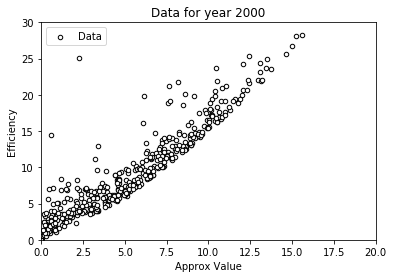

In [82]:
plt.title("Data for year 2000")


b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1],
          ["Data"],loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

### For the year 2000

We use our functions to get the data and features for the year 2000.

In [83]:
data_for_year = data_4_year(2000)
X = select_features(data_for_year)

We first visualize the data before finding the outliers.

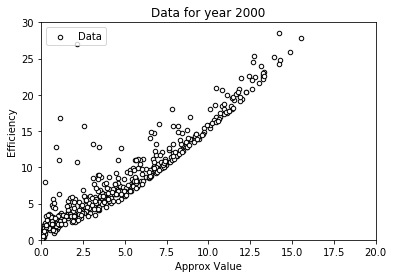

In [84]:
plt.title("Data for year 2000")


b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1],
          ["Data"],loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

Now we use the built in functions from sklearn to perform outlier detection using the isolation forest method.

In [85]:
clf = IsolationForest(n_estimators=100,max_samples=440,contamination=0.1)
y_pred_train =clf.fit_predict(X)

In [86]:
outlier=[]
for i in range(len(X)):
    if (y_pred_train[i] == -1):
        outlier.append(X[i])
        
outlier=np.array(outlier)

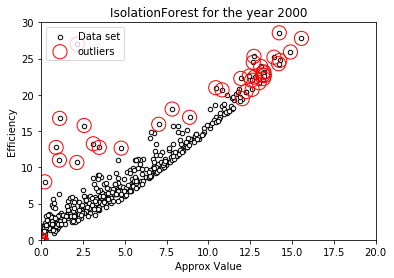

In [87]:
plt.title("IsolationForest for the year 2000")
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(outlier[:, 0], outlier[:, 1], c='',
                 s=20*10, edgecolor='red',facecolor='none')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1, b2],
          ["Data set",
             "outliers"],
           loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In the above plot we note that the outliers are circled in red. A description of the method of the isolation forest is explained in the report. 

In [88]:
outlier_index=[]

for i in outlier.tolist():
    outlier_index.append(X.tolist().index(i))
    
for i in range(len(outlier_index)):
    print(data_for_year.iloc[outlier_index[i]]['firstname'],data_for_year.iloc[outlier_index[i]]['lastname'])

Ray Allen
Raja Bell
Elton Brand
Kobe Bryant
Marcus Camby
Vince Carter
Tim Duncan
Jamie Feick
Michael Finley
Derek Fisher
Danny Fortson
Steve Francis
Kevin Garnett
Anfernee Hardaway
Grant Hill
Zydrunas Ilgauskas
Allen Iverson
Antawn Jamison
Eddie Jones
Garth Joseph
Lari Ketner
Jason Kidd
Raja Bell
Karl Malone
Stephon Marbury
Shawn Marion
Anthony Mason
Antonio Mcdyess
Tracy Mcgrady
Chris Mills
Alonzo Mourning
Dirk Nowitzki
Shaquille O'neal
Raja Bell
Gary Payton
Paul Pierce
Theo Ratliff
Mitch Richmond
Terranc Roberson
Keith Vanhorn
Antoine Walker
Rasheed Wallace
Chris Webber
David Wingate


The Above are the list of names of the outstanding players for the year 2000.

### For the year 2001

In [89]:
data_for_year = data_4_year(2001)
X = select_features(data_for_year)

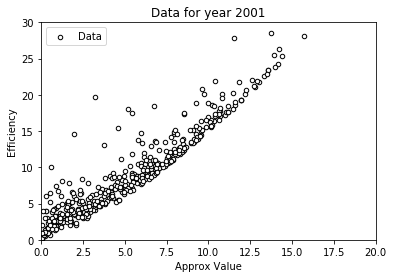

In [90]:
plt.title("Data for year 2001")


b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1],
          ["Data"],loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In [91]:
clf = IsolationForest(n_estimators=100,max_samples=440,contamination=0.1)
y_pred_train =clf.fit_predict(X)

In [92]:
outlier=[]
for i in range(len(X)):
    if (y_pred_train[i] == -1):
        outlier.append(X[i])
        
outlier=np.array(outlier)

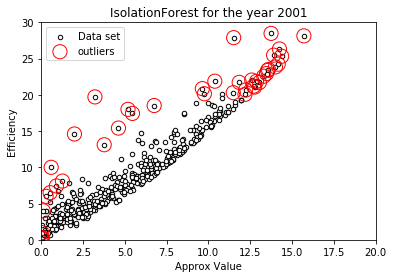

In [93]:
plt.title("IsolationForest for the year 2001")
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(outlier[:, 0], outlier[:, 1], c='',
                 s=20*10, edgecolor='red',facecolor='none')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1, b2],
          ["Data set",
             "outliers"],
           loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In [94]:
outlier_index=[]

for i in outlier.tolist():
    outlier_index.append(X.tolist().index(i))
    
for i in range(len(outlier_index)):
    print(data_for_year.iloc[outlier_index[i]]['firstname'],data_for_year.iloc[outlier_index[i]]['lastname'])

Shareef Abdur-rahim
Brent Barry
Charlie Bell
Elton Brand
Terrell Brandon
Dee Brown
Ernest Brown
Kobe Bryant
Marcus Camby
Vince Carter
Sam Cassell
Chris Crawford
Michael Dickerson
Tim Duncan
Steve Francis
Kevin Garnett
Pau Gasol
Matt Geiger
Grant Hill
Tyrone Hill
Allen Iverson
Jason Kidd
Karl Malone
Shawn Marion
Darrick Martin
Jamal Mashburn
Antonio Mcdyess
Tracy Mcgrady
Andre Miller
Dirk Nowitzki
Lamar Odom
Jermaine O'neal
Shaquille O'neal
Gary Payton
Elliot Perry
Paul Pierce
Theo Ratliff
Isaiah Rider
Dickey Simpkins
Ratko Varda
Antoine Walker
Ben Wallace
Rasheed Wallace
Chris Webber


### For year 2002

In [95]:
data_for_year = data_4_year(2002)
X = select_features(data_for_year)

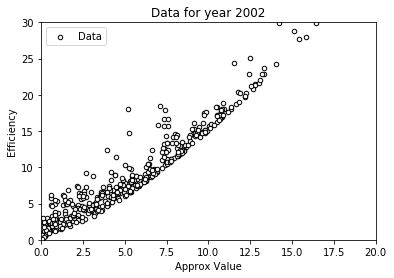

In [96]:
plt.title("Data for year 2002")


b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1],
          ["Data"],loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In [97]:
clf = IsolationForest(n_estimators=100,max_samples=440,contamination=0.1)
y_pred_train =clf.fit_predict(X)

/Users/ianjoeldavid/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:288: UserWarning: max_samples (440) is greater than the total number of samples (428). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


In [98]:
outlier=[]
for i in range(len(X)):
    if (y_pred_train[i] == -1):
        outlier.append(X[i])
        
outlier=np.array(outlier)

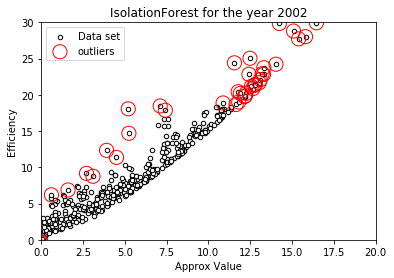

In [99]:
plt.title("IsolationForest for the year 2002")
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(outlier[:, 0], outlier[:, 1], c='',
                 s=20*10, edgecolor='red',facecolor='none')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1, b2],
          ["Data set",
             "outliers"],
           loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In [100]:
outlier_index=[]

for i in outlier.tolist():
    outlier_index.append(X.tolist().index(i))
    
for i in range(len(outlier_index)):
    print(data_for_year.iloc[outlier_index[i]]['firstname'],data_for_year.iloc[outlier_index[i]]['lastname'])

Shareef Abdur-Rahim
Ray Allen
Elton Brand
Kobe Bryant
Marcus Camby
Vince Carter
Sam Cassell
Tim Duncan
Marcus Fizer
Steve Francis
Kevin Garnett
Pau Gasol
Horace Grant
A.J. Guyton
Kirk Haston
Grant Hill
Allen Iverson
Antawn Jamison
Eddie Jones
Michael Jordan
Jason Kidd
Karl Malone
Stephon Marbury
Shawn Marion
Donny Marshall
Jamal Mashburn
Tracy McGrady
Dikembe Mutombo
Steve Nash
Dirk Nowitzki
Michael Olowokandi
Jermaine O'Neal
Shaquille O'Neal
Cherokee Parks
Gary Payton
Paul Pierce
Don Reid
Paul Shirley
Ben Wallace
Rasheed Wallace
Chris Webber
Jahidi White
Brandon Williams


### For year 2003

In [101]:
data_for_year = data_4_year(2003)
X = select_features(data_for_year)

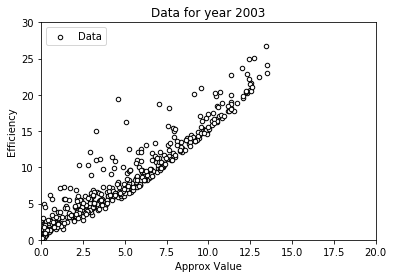

In [102]:
plt.title("Data for year 2003")


b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1],
          ["Data"],loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In [103]:
clf = IsolationForest(n_estimators=100,max_samples=440,contamination=0.1)
y_pred_train =clf.fit_predict(X)

In [104]:
outlier=[]
for i in range(len(X)):
    if (y_pred_train[i] == -1):
        outlier.append(X[i])
        
outlier=np.array(outlier)

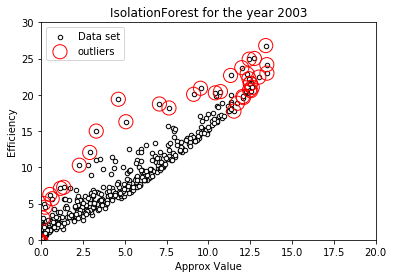

In [105]:
plt.title("IsolationForest for the year 2003")
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(outlier[:, 0], outlier[:, 1], c='',
                 s=20*10, edgecolor='red',facecolor='none')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1, b2],
          ["Data set",
             "outliers"],
           loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In [106]:
outlier_index=[]

for i in outlier.tolist():
    outlier_index.append(X.tolist().index(i))
    
for i in range(len(outlier_index)):
    print(data_for_year.iloc[outlier_index[i]]['firstname'],data_for_year.iloc[outlier_index[i]]['lastname'])

Shareef Abdur-rahim
Ray Allen
Dana Barros
Carlos Boozer
Elton Brand
Damone Brown
Tierre Brown
Kobe Bryant
Sam Cassell
Keon Clark
Mateen Cleaves
Jason Collier
Tim Duncan
Alex Garcia
Kevin Garnett
Matt Harpring
Alan Henderson
Allen Iverson
Richard Jefferson
Popeye Jones
Jason Kidd
Andrei Kirilenko
Raef LaFrentz
Karl Malone
Shawn Marion
Donyell Marshall
Kenyon Martin
Jamal Mashburn
Tracy McGrady
Brad Miller
Yao Ming
Alonzo Mourning
Dirk Nowitzki
Jermaine O'Neal
Shaquille O'Neal
Kirk Penney
Zach Randolph
Jamal Sampson
Leon Smith
Predrag Stojakovic
Amare Stoudemire
Cezary Trybanski
Kirk Penney
Ben Wallace
Chris Webber


### For year 2004

In [107]:
data_for_year = data_4_year(2004)
X = select_features(data_for_year)

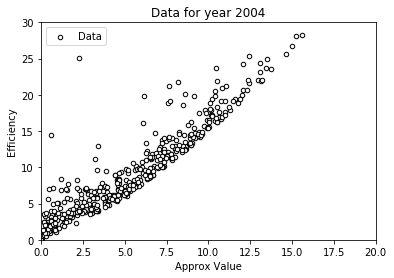

In [108]:
plt.title("Data for year 2004")


b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1],
          ["Data"],loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In [109]:
clf = IsolationForest(n_estimators=100,max_samples=440,contamination=0.1)
y_pred_train =clf.fit_predict(X)

In [110]:
outlier=[]
for i in range(len(X)):
    if (y_pred_train[i] == -1):
        outlier.append(X[i])
        
outlier=np.array(outlier)

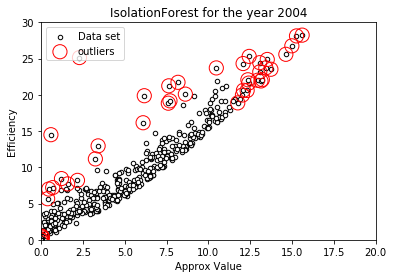

In [111]:
plt.title("IsolationForest for the year 2004")
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X[:, 0], X[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(outlier[:, 0], outlier[:, 1], c='',
                 s=20*10, edgecolor='red',facecolor='none')

plt.axis('tight')
plt.xlim((0, 20))
plt.ylim((0, 30))
plt.legend([b1, b2],
          ["Data set",
             "outliers"],
           loc="upper left")
plt.xlabel('Approx Value')
plt.ylabel('Efficiency')
plt.show()

In [112]:
outlier_index=[]

for i in outlier.tolist():
    outlier_index.append(X.tolist().index(i))
    
for i in range(len(outlier_index)):
    print(data_for_year.iloc[outlier_index[i]]['firstname'],data_for_year.iloc[outlier_index[i]]['lastname'])

Gilbert Arenas
Ron Artest
Maurice Baker
Lonny Baxter
Mike Bibby
Carlos Boozer
Elton Brand
Kobe Bryant
Vince Carter
Omar Cook
Baron Davis
Tim Duncan
Ndudi Ebi
Andre Emmett
Steve Francis
Kevin Garnett
Kendall Gill
Drew Gooden
Donnell Harvey
Allan Houston
Allen Iverson
Bobby Jackson
LeBron James
Richard Jefferson
Linton Johnson
Andrei Kirilenko
Lonny Baxter
Ibrahim Kutluay
Voshon Lenard
Jamaal Magloire
Stephon Marbury
Shawn Marion
Tracy McGrady
Brad Miller
Yao Ming
Steve Nash
Dirk Nowitzki
Jermaine O'Neal
Shaquille O'Neal
Lonny Baxter
Paul Pierce
Lonny Baxter
Zach Randolph
Glenn Robinson
Amare Stoudemire
Jamaal Tinsley
Dwyane Wade
